# Time Series Analysis

Prophet Model

In [1]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [2]:
from prophet import Prophet

In [3]:
import pandas as pd
# read a csv file to dataframe
df = pd.read_csv('/content/SalesDaily (1).csv')

In [4]:
df = df.tail(150)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [6]:
df.head()

,Date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name
1956,2019-05-12,4.67,1.680,3.10,38.8,2.0,1.0,19.000000,5.0,2019,5,Sunday
1957,2019-05-13,5.00,4.527,2.00,26.2,11.0,0.0,11.000000,3.0,2019,5,Monday
1958,2019-05-14,6.67,4.363,4.00,25.0,5.0,0.0,11.000000,3.0,2019,5,Tuesday
1959,2019-05-15,4.00,1.066,4.15,28.4,7.0,0.0,5.000000,3.0,2019,5,Wednesday
1960,2019-05-16,5.00,1.067,2.00,12.0,9.0,1.0,16.291667,5.0,2019,5,Thursday


<ipython-input-7-aa0c01574da0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns= {'Date':'ds','M01AB':'y'},inplace= True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwbqj7lm/b0zz132t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwbqj7lm/cdfhj84u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3918', 'data', 'file=/tmp/tmpdwbqj7lm/b0zz132t.json', 'init=/tmp/tmpdwbqj7lm/cdfhj84u.json', 'output', 'file=/tmp/tmpdwbqj7lm/prophet_m

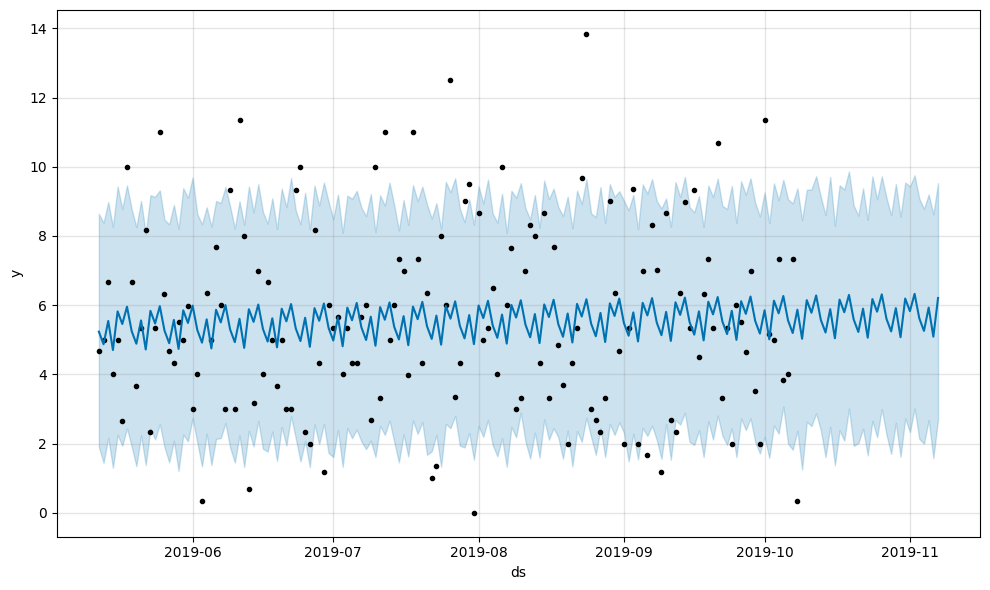

In [7]:
# Create and fit the Prophet model
ts_data_edit = df[['Date', 'M01AB']]
ts_data_edit.rename(columns= {'Date':'ds','M01AB':'y'},inplace= True)
model = Prophet()
model.fit(ts_data_edit)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Visualize the forecast
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

# Assuming you have already fitted a Prophet model and have a forecast named 'forecast'

# Create a Prophet forecast plot
fig = model.plot(forecast)

